In [2]:
### IMPORTING THE LIBRARIES
import pandas as pd                 # reading data set
import matplotlib.pyplot as plt     # data visualization
import numpy as np      # arrays
import seaborn as sns   # make use of the colourful maps eg:- Heat Map
from sklearn.model_selection import train_test_split        # train-test splitting
from sklearn.impute import SimpleImputer                    # Imputer function
from sklearn.ensemble import RandomForestClassifier         # Algorithm performed
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score  # Calculating Accuracy

In [3]:
### READING THE CSV FILE
data = pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [48]:
### CHECKING THE DATA FROM THE DATASET/CSV FILE
print(data.shape)    # gives the shape of the data present (number_of_rows, number_of_columns)
print(data.head())   # displays the first "n" rows of the data from the dataset
print(data.columns)  # displays the columns in the dataset.

(768, 9)
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [49]:
## CHECKING IF I HAVE NULL VALUES IN MY DATASET
print(data.isnull().values.any())  # returns False so that means there are no null values

False


In [50]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

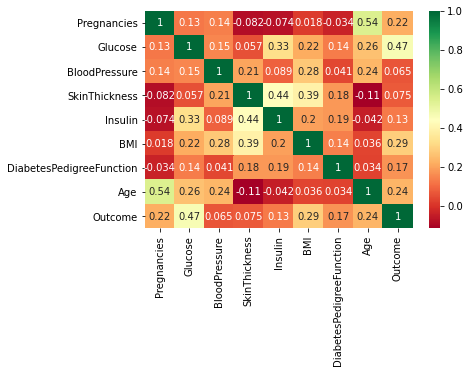

<Figure size 1440x1440 with 0 Axes>

In [51]:
### GETTING CORRELATION (describing the relationship) OF EACH FEATURE IN DATASET
corrMat = data.corr()  # makes the correlation matrix
top_corr_features = corrMat.index  # gets the columns feature names
graph = sns.heatmap(data[top_corr_features].corr(), annot=True, cmap="RdYlGn")  # plotting the heatmap

plt.figure(figsize=(20, 20))
plt.show()

In [52]:
### GETTING THE CORRELATION VALUES
print(data.corr())    # returns a table with the data used for the heatmap above

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

In [53]:
### GETTING THE COUNT OF DIABETES TRUE AND FALSE
print(data.head(3))
diabetes_true_count = len(data.loc[data['Outcome'] == True])        # 1 -> True
diabetes_false_count = len(data.loc[data['Outcome'] == False])      # 0 -> False
print(diabetes_true_count, diabetes_false_count)                    # Displays the count 268 500

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
268 500


In [54]:
### PERFORMING TRAIN-TEST SPLIT
feature_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']  # collecting independent features
predicted_class = ['Outcome']    # collecting dependent features

In [55]:
X = data[feature_columns].values    # independent feature values
y = data[predicted_class].values    # dependent feature values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)     # splitting data into train and test

In [56]:
### CHECKING HOW MANY OTHER MISSING ZERO VALUES
print()
print("Total number of rows : {0}".format(len(data)))
print("number of rows missing glucose_conc: {0}".format(len(data.loc[data['Glucose'] == 0])))
print("number of rows missing Pregnancies: {0}".format(len(data.loc[data['Pregnancies'] == 0])))
print("number of rows missing BloodPressure: {0}".format(len(data.loc[data['BloodPressure'] == 0])))
print("number of rows missing SkinThickness: {0}".format(len(data.loc[data['SkinThickness'] == 0])))
print("number of rows missing Insulin: {0}".format(len(data.loc[data['Insulin'] == 0])))
print("number of rows missing BMI: {0}".format(len(data.loc[data['BMI'] == 0])))
print("number of rows missing DiabetesPedigreeFunction: {0}".format(len(data.loc[data['DiabetesPedigreeFunction'] == 0])))
print("number of rows missing Age: {0}".format(len(data.loc[data['Age'] == 0])))




Total number of rows : 768
number of rows missing glucose_conc: 5
number of rows missing Pregnancies: 111
number of rows missing BloodPressure: 35
number of rows missing SkinThickness: 227
number of rows missing Insulin: 374
number of rows missing BMI: 11
number of rows missing DiabetesPedigreeFunction: 0
number of rows missing Age: 0


In [57]:
### USING IMPUTER FUNCTION TO FILL THE MISSING VALUES
fill_values = SimpleImputer(missing_values=0, strategy="mean")  # replacing the missing values with the "mean" value for all the rows

X_train = fill_values.fit_transform(X_train)    # the 0 values in the X_train will get replaced with the mean value
X_test = fill_values.fit_transform(X_test)      # the 0 values in the X_train will get replaced with the mean value

In [66]:

# Training with a Random Forest Classifier 
from sklearn.ensemble.forest import RandomForestClassifier 
randomForestModel = RandomForestClassifier(random_state=10).fit(X_train, y_train) 
randomForestModel_predictions = randomForestModel.predict(X_test) 
  
# accuracy on X_test 
accuracy = randomForestModel.score(X_test, y_test) 
  
# creating a confusion matrix 
cm = confusion_matrix(y_test, randomForestModel_predictions) 
ac = accuracy_score(y_test, randomForestModel_predictions)
rs = recall_score(y_test, randomForestModel_predictions, average=None)
ps = precision_score(y_test, randomForestModel_predictions, average=None)

print("Confusion matrix: " + str(cm))
print("Accuracy score: " + str(ac*100))
print("Recall score: " + str(rs))
print("Precision score: " + str(ps))

TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

sensitivity = TP/(TP+FN)
specificity = TN/(TN+FP)

"Sensitivity: {} | Specifictity: {}".format(sensitivity, specificity)

c:\users\nazhim\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Confusion matrix: [[130  20]
 [ 29  52]]
Accuracy score: 78.78787878787878
Recall score: [0.86666667 0.64197531]
Precision score: [0.81761006 0.72222222]


'Sensitivity: 0.6419753086419753 | Specifictity: 0.8666666666666667'

In [67]:
# training a DescisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier 

dtree_model = DecisionTreeClassifier(max_depth = 2).fit(X_train, y_train) 
dtree_predictions = dtree_model.predict(X_test) 

# creating a confusion matrix 
cm = confusion_matrix(y_test, dtree_predictions) 
ac = accuracy_score(y_test, dtree_predictions)
rs = recall_score(y_test, dtree_predictions, average=None)
ps = precision_score(y_test, dtree_predictions, average=None)

print("Confusion matrix: " + str(cm))
print("Accuracy score: " + str(ac*100))
print("Recall score: " + str(rs))
print("Precision score: " + str(ps))

TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

sensitivity = TP/(TP+FN)
specificity = TN/(TN+FP)

"Sensitivity: {} | Specifictity: {}".format(sensitivity, specificity)

Confusion matrix: [[142   8]
 [ 52  29]]
Accuracy score: 74.02597402597402
Recall score: [0.94666667 0.35802469]
Precision score: [0.73195876 0.78378378]


'Sensitivity: 0.35802469135802467 | Specifictity: 0.9466666666666667'

In [60]:
# training a linear SVM classifier 
from sklearn.svm import SVC 

## training a SVM classifier 
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train, y_train) 

## Prediction using SVM
svm_predictions = svm_model_linear.predict(X_test) 
print(svm_predictions)
  
# model accuracy for X_test   
accuracy = svm_model_linear.score(X_test, y_test) 
  
# creating a confusion matrix, calculating accuracy, calculating score, calculating precision
cm = confusion_matrix(y_test, svm_predictions) 
ac = accuracy_score(y_test, svm_predictions)
rs = recall_score(y_test, svm_predictions, average=None)
ps = precision_score(y_test, svm_predictions, average=None)

print("Confusion matrix: " + str(cm))
print("Accuracy score: " + str(ac*100))
print("Recall score: " + str(rs))
print("Precision score: " + str(ps))

TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

sensitivity = TP/(TP+FN)
specificity = TN/(TN+FP)

"Sensitivity: {} | Specifictity: {}".format(sensitivity, specificity)

c:\users\nazhim\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0
 1 1 0 1 0 0 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0
 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 1 0 1 0
 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 0 0 1 0 1 1 0 0]
Confusion matrix: [[135  15]
 [ 34  47]]
Accuracy score: 78.78787878787878
Recall score: [0.9        0.58024691]
Precision score: [0.79881657 0.75806452]


'Sensitivity: 0.5802469135802469 | Specifictity: 0.9'

In [61]:
from sklearn.neighbors import KNeighborsClassifier 
error_rate = []

for i in range(1,40):  #checking from 1 to 40 for the K value
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test)) # when the 'pred' value doesn't match with the 'y value' I get the mean of that

c:\users\nazhim\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
c:\users\nazhim\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
c:\users\nazhim\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
c:\users\nazhim\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), fo

Text(0, 0.5, 'Error Rate')

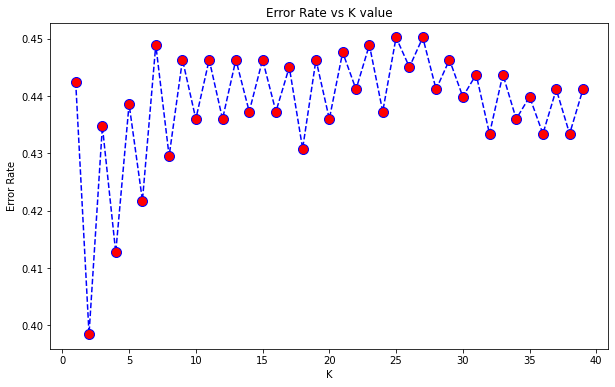

In [62]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 40), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red' ,markersize=10)
plt.title('Error Rate vs K value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [63]:
## Training a KNN classifier ( Accuracy score: 99.3 % )

## training a KNN classifier  (from the graph it's found that K=7 is the best choice of all)
knn = KNeighborsClassifier(n_neighbors = 3).fit(X_train, y_train) 

## Prediction using KNN
knn_predictions = knn.predict(X_test)  
print(knn.predict(X_test))

## Accuracy on X_test 
accuracy = knn.score(X_test, y_test) 

## Creating a confusion matrix 
cm = confusion_matrix(y_test, knn_predictions) 
ac = accuracy_score(y_test, knn_predictions)
rs = recall_score(y_test, knn_predictions, average=None)
ps = precision_score(y_test, knn_predictions, average=None)

## Displaying the content
print("Confusion matrix: " + str(cm))
print("Accuracy score: " + str(ac*100))
print("Recall score: " + str(rs))
print("Precision score: " + str(ps))

TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

sensitivity = TP/(TP+FN)
specificity = TN/(TN+FP)

"Sensitivity: {} | Specifictity: {}".format(sensitivity, specificity)

[1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1
 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0
 1 1 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 1 1 1 0 0 1 0 0 0 0 0 0 1
 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 1 1 1 0 0 1 0
 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0
 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0
 1 0 0 1 0 1 1 0 1]
Confusion matrix: [[127  23]
 [ 39  42]]
Accuracy score: 73.16017316017316
Recall score: [0.84666667 0.51851852]
Precision score: [0.76506024 0.64615385]


c:\users\nazhim\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


'Sensitivity: 0.5185185185185185 | Specifictity: 0.8466666666666667'

In [64]:
# training a Naive Bayes classifier 
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB().fit(X_train, y_train) 
gnb_predictions = gnb.predict(X_test) 
  
# accuracy on X_test 
accuracy = gnb.score(X_test, y_test) 
  
# creating a confusion matrix 
cm = confusion_matrix(y_test, gnb_predictions) 
ac = accuracy_score(y_test, gnb_predictions)
rs = recall_score(y_test, gnb_predictions, average=None)
ps = precision_score(y_test, gnb_predictions, average=None)

print("Confusion matrix: " + str(cm))
print("Accuracy score: " + str(ac*100))
print("Recall score: " + str(rs))
print("Precision score: " + str(ps))

TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

sensitivity = TP/(TP+FN)
specificity = TN/(TN+FP)

"Sensitivity: {} | Specifictity: {}".format(sensitivity, specificity)

Confusion matrix: [[125  25]
 [ 31  50]]
Accuracy score: 75.75757575757575
Recall score: [0.83333333 0.61728395]
Precision score: [0.80128205 0.66666667]


c:\users\nazhim\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


'Sensitivity: 0.6172839506172839 | Specifictity: 0.8333333333333334'

### Saving the Model using joblib

In [4]:
import joblib

joblib.dump(randomForestModel, 'diabeties-pred-model.pkl')



NameError: name 'randomForestModel' is not defined

### Using loaded model

In [5]:
loadedModel = joblib.load('diabeties-pred-model.pkl')

In [9]:
CATEGORIES = ["Negative", "Positive"]
#['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
# Pregnancies : Number of times pregnant
# Glucose : Plasma glucose concentration a 2 hours in an oral glucose tolerance test
# BloodPressure : Diastolic blood pressure (mm Hg)
# SkinThickness : Triceps skin fold thickness (mm)
# Insulin : 2-Hour serum insulin (mu U/ml)
# BMI : Body mass index (weight in kg/(height in m)^2)
# DiabetesPedigreeFunction : Diabetes pedigree function
# Age : Age (years)

new_test = [[6,188,72,35,168,33.6,0.627,50]]
CATEGORIES[loadedModel.predict(new_test)[0]]

'Positive'

In [11]:
new_test = [[2,48,2,5,3.6,0.627,0,20]]
CATEGORIES[loadedModel.predict(new_test)[0]]

'Negative'

In [8]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
